In [11]:
import wotan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wotan import flatten
from wotan import t14
from astropy.timeseries import BoxLeastSquares

In [56]:
def bls_analysis(tic_id):
    data_file = 'https://raw.githubusercontent.com/HarritonResearchLab/sunnyhills/main/data/LightCurve_keys/TIC%'+tic_id+'.csv'
    data_file = 'https://raw.githubusercontent.com/HarritonResearchLab/sunnyhills/main/data/LightCurve_keys/TIC%20950715112.csv'
    #data_file = 'https://raw.githubusercontent.com/HarritonResearchLab/sunnyhills/main/data/LightCurve_keys/TIC%20178246933.csv'
    print(data_file)
    lc_df = pd.read_csv(data_file)
    ls_df = lc_df[['time', 'flux', 'flux_err']]
    raw_times = np.array(ls_df['time'])
    raw_fluxes = np.array(ls_df['flux'])
    raw_flux_errs = np.array(ls_df['flux_err'])
    
    flatten_lc3, trend_lc3 = flatten(
    raw_times,                 # Array of time values
    raw_fluxes,                 # Array of flux values
    method='ridge',
    window_length=.01,    # The length of the filter window in units of ``time``
    break_tolerance=0.5,  # Split into segments at breaks longer than that
    return_trend=True,    # Return trend and flattened light curve
    )
    

    upper_lim = np.mean(flatten_lc3)+np.std(flatten_lc3)

    mask = np.where(flatten_lc3<upper_lim)
    raw_times = raw_times[mask]
    flatten_lc3 = flatten_lc3[mask]

    durations = np.linspace(0.05, 0.2, 20)
    model_bls = BoxLeastSquares(raw_times, flatten_lc3)
    results = model_bls.autopower(durations, frequency_factor=3)
    period = results.period[np.argmax(results.power)]

    print(results.period[np.argsort(results.power)[::-1]][0:20])

    plt.scatter(raw_times, flatten_lc3,s=1)
    plt.axhline(y=upper_lim)

    plt.show()
    plt.clf()
    plt.close()

    plt.figure()
    ax = plt.gca()
    ax.axvline(period, alpha=0.4, lw=3)
    for n in range(2, 10):
        ax.axvline(n*period, alpha=0.4, lw=1, linestyle="dashed")
        ax.axvline(period / n, alpha=0.4, lw=1, linestyle="dashed")
    plt.ylabel(r'SDE BLS')
    plt.xlabel('Period (days)')
    plt.plot(results.period, results.power, color='black', lw=0.5)
    plt.xlim(0, max(results.period))

    index = np.argmax(results.power)
    period = results.period[index]
    t0 = results.transit_time[index]
    duration = results.duration[index]

    #period = 1.04382204

    plt.figure()
    ax = plt.gca()
    x = (raw_times - t0 + 0.5*period) % period - 0.5*period
    m = np.abs(x) < 0.5
    plt.scatter(
        x[m],
        flatten_lc3[m],
        color='blue',
        s=10,
        alpha=0.5,
        zorder=2)
    x = np.linspace(-0.13, 0.13, 1000)
    f = model_bls.model(x + t0, period, duration, t0)
    ax.plot(x, f, color='red')
    ax.set_xlim(-0.13, 0.13)
    #plt.ylim(0.9985, 1.00025)
    ax.set_xlabel("Time from mid-transit (days)")
    ax.set_ylabel("Flux");

https://raw.githubusercontent.com/HarritonResearchLab/sunnyhills/main/data/LightCurve_keys/TIC%20950715112.csv
[4.1807584  4.18440866 4.17347695 2.08794838 4.16984572 2.08703913
 4.18806531 4.1771145  2.08613067 2.08522299 2.08341002 2.08885843
 4.19172834 2.08431611 2.09525104 2.08976927 8.37370958 4.16622081
 8.35910421 2.08250471]


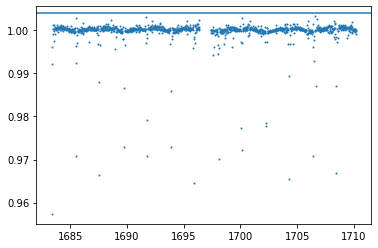

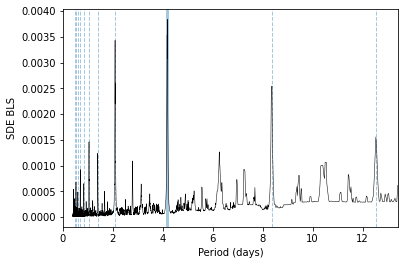

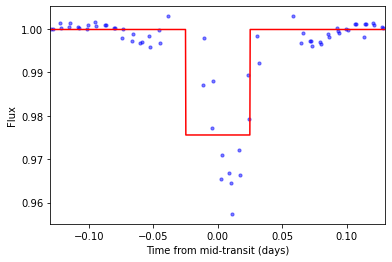

In [57]:
ids = ['950715112', '178246933']

bls_analysis(ids[1])